# Introduction

## Business Understanding



# Results

# Exploratory Data Analysis

# Introduction

In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("bank_churn2.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df.shape

(10000, 12)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


- Average age of customers is approximately 39 years old
- Follow up on the previous point, average salary is about 100k. I wonder what currency this is considering that it is in three different countries or if it has been converted to USD **(Let's assume it's USD)**
- On average, churn rate is about 20% (considering that churn is a binary feature)
- Value counts of every feature match, which means there aren't any missing values in this data set
- Max tenure of the customers of this dataset is 10 years, but on average the tenure is 5 years. This seems like a really short time considering the age range of the customers.

In [60]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Current Customers (0) vs. Customers Churned (1)
0    7963
1    2037
Name: churn, dtype: int64


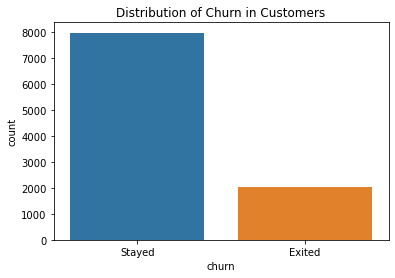

In [61]:
import seaborn as sns

print('Current Customers (0) vs. Customers Churned (1)')
print(df.churn.value_counts())

ax = sns.countplot(data=df,x = 'churn')
ax.set_xticklabels(['Stayed','Exited'])
ax.set_title("Distribution of Churn in Customers");

In [62]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

- As I suspected, there are no missing values in any of the columns

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


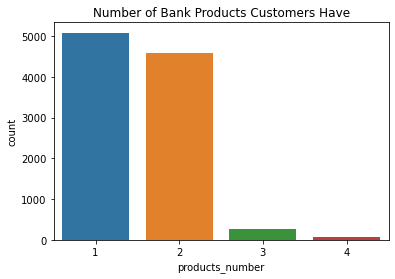

In [86]:
print(df["products_number"].value_counts())
ax = sns.countplot(data=df,x='products_number')
ax.set_title("Number of Bank Products Customers Have");

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64


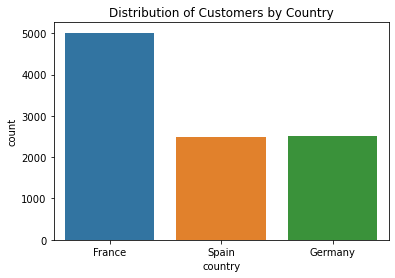

In [64]:
print(df["country"].value_counts())
ax = sns.countplot(data=df,x='country')
ax.set_title("Distribution of Customers by Country");

- The countries for this dataset are from **France, Germany, and Spain**. How does this impact our analysis?

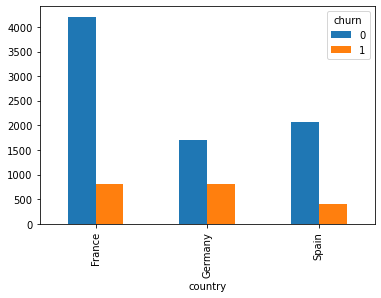

In [10]:
df.groupby(["country", "churn"]).size().unstack(level=1).plot(kind='bar');

Male      5457
Female    4543
Name: gender, dtype: int64


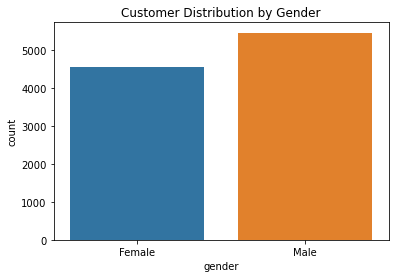

In [66]:
print(df.gender.value_counts())
ax = sns.countplot(data=df,x='gender')
ax.set_title("Customer Distribution by Gender");

- The gender distribution is almost split evenly, but there are more male customers than female

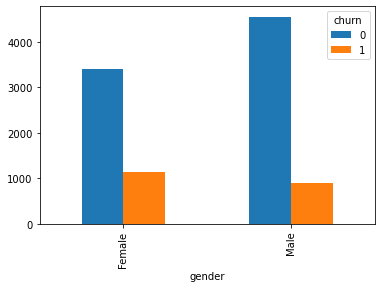

In [12]:
df.groupby(["gender", "churn"]).size().unstack(level=1).plot(kind='bar');

In [13]:
df.duplicated().sum()

0

- There are no duplications in the dataset either, so the dataset is pretty clean to move onto visualizations

<AxesSubplot:>

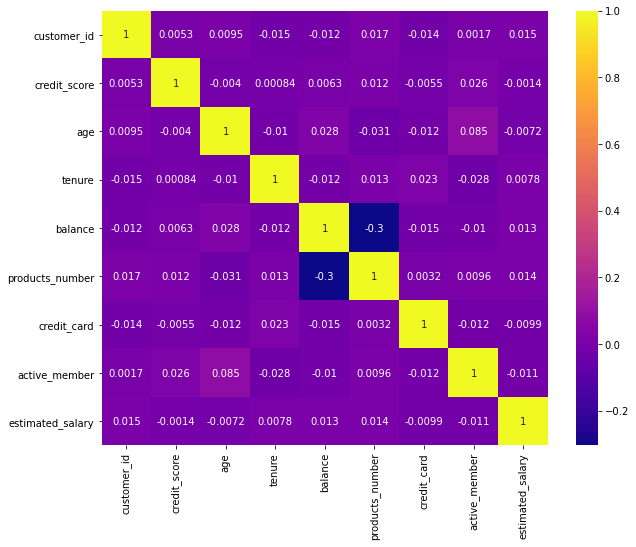

In [14]:
#Visualizing correlations between the features using a heatmap
df2 = df.drop("churn", axis=1)
corr = df2.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True, cmap='plasma')

- The top three most **positively correlated** values are:
    - **age vs. active_member:** 0.085
    - **age vs. balance:** 0.028
    - **credit_score vs. active_member:** 0.026


- The most **negatively correlated** values is:
    - **balance vs. products_number:** -0.3

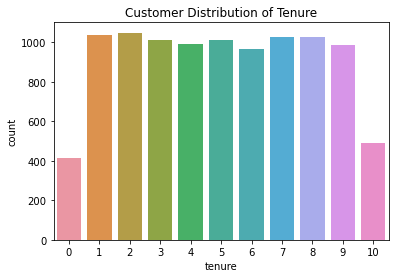

In [72]:
ax = sns.countplot(data = df, x='tenure')
ax.set_title("Customer Distribution of Tenure");

<AxesSubplot:xlabel='country', ylabel='Count'>

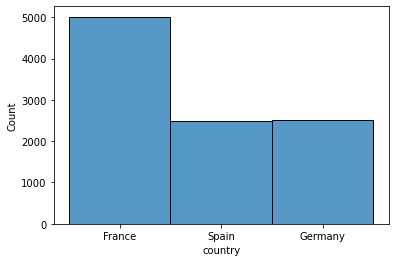

In [16]:
sns.histplot(df['country'])

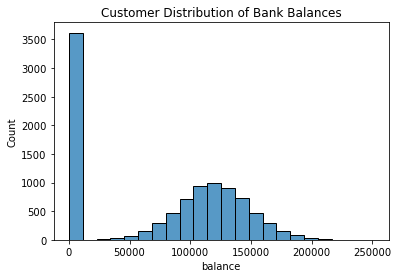

In [69]:
ax = sns.histplot(df['balance'])
ax.set_title("Customer Distribution of Bank Balances");

- Most people have a balance of 0 maybe 20% of the people who churn come from this category

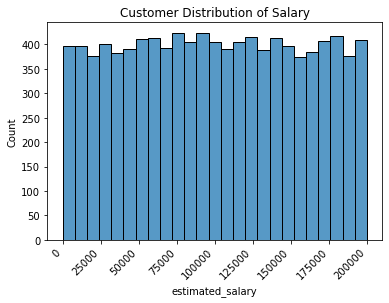

In [67]:
ax = sns.histplot(df['estimated_salary'], bins=25)
plt.xticks(rotation=45, ha='right')
ax.set_title("Customer Distribution of Salary");

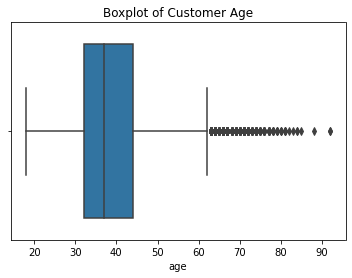

In [84]:
ax = sns.boxplot(data = df, x='age')
ax.set_title("Boxplot of Customer Age");

### Multiple Logistic Regression

In [20]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

In [21]:
import statsmodels.api as sm

X = df[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X = sm.add_constant(X)
y = df['churn']

In [22]:
model = sm.OLS(y, X).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     157.9
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          4.68e-309
Time:                        11:50:10   Log-Likelihood:                -4361.3
No. Observations:               10000   AIC:                             8745.
Df Residuals:                    9989   BIC:                             8824.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1083      0.034  

###### According to the F-Statistic p-value it seems as though the value is much lower than the set alpha of 0.05, indicating that the model is statistically significant.

### Comparing Logistic Regression without Dataset Values of Zero Balance

<AxesSubplot:xlabel='balance', ylabel='Count'>

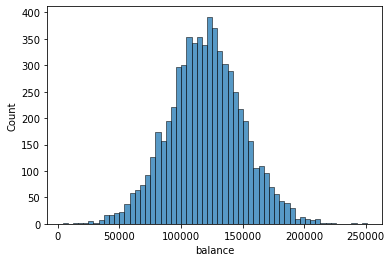

In [23]:
df2 = df[df['balance'] != 0]
sns.histplot(df2['balance'])

In [24]:
df2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1


In [25]:
df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
df2['country'] = LabelEncoder().fit_transform(df2['country'])

X2 = df2[['credit_score','age','tenure','estimated_salary','balance','products_number','active_member','credit_card','gender','country']]
X2 = sm.add_constant(X2)
y2 = df2['churn']

model = sm.OLS(y2, X2).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     108.0
Date:                Fri, 08 Dec 2023   Prob (F-statistic):          3.79e-208
Time:                        11:50:11   Log-Likelihood:                -3134.0
No. Observations:                6383   AIC:                             6290.
Df Residuals:                    6372   BIC:                             6364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1782      0.048  

<ipython-input-25-a29296654c09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gender'] = LabelEncoder().fit_transform(df2['gender'])
<ipython-input-25-a29296654c09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['country'] = LabelEncoder().fit_transform(df2['country'])


- The R-Squared value for the logistic regression of data without the balance of zero is higher than with the data that included the zero balance.
- 0.145 as an R Squared value is still pretty low and indicates there are more independent variables beyond the scope of the dataset that influences the variance of the churn.
- The probability of F-statistic is still lower than the alpha value of 0.05 indicating that this model is still significant.

### Feature Importance

In [26]:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Text(0.5, 1.0, 'Out-of-Bag Error')

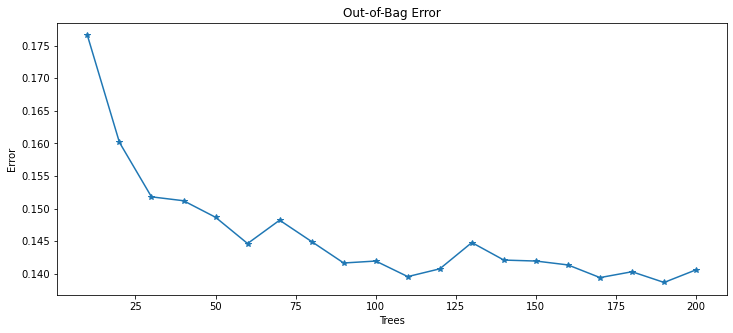

In [28]:
trees = np.linspace(10, 200, 20, dtype=np.int16)

OOB_Score = []
for num_trees in trees:
    rf = RandomForestClassifier(n_estimators=num_trees, warm_start=True, oob_score=True).fit(X_train, y_train)
    OOB_Score.append(1-rf.oob_score_)
    
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(trees, OOB_Score, '-*')
ax.set_xlabel('Trees')
ax.set_ylabel('Error')
ax.set_title('Out-of-Bag Error')

In [29]:
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [30]:
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
print('Accuracy of Random Forest', rf_accuracy)

Accuracy of Random Forest 0.860909090909091


<AxesSubplot:>

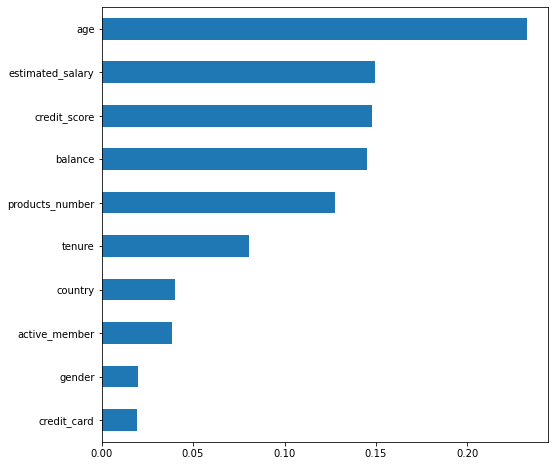

In [31]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots(figsize=(8,8))
forest_importances.sort_values().plot.barh(ax=ax)

- Interestingly enough it doesn't seem as though being an active member is as an important feature as we thought
- Let's take a deeper dive into these features

In [99]:
bins = [15, 20, 25, 30, 35, 40, 45, 50 , 55, 60, 65, 70, 75, 80, 85, 90, 95]
pd.crosstab(df['churn'], pd.cut(df['age'], bins, normalize ='index')

TypeError: cut() got an unexpected keyword argument 'normalize'

- Highest churn rate is coming from customers who are between the ages of 35 to 60, with over 1000 customers churning just within this age range

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

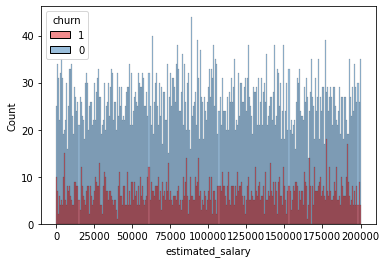

In [33]:
sns.histplot(x = "estimated_salary", hue = "churn", data = df,bins = 300, palette = "Set1", hue_order = [1,0])

- There doesn't seem to be a specific trend to churn when it comes to estimated salary

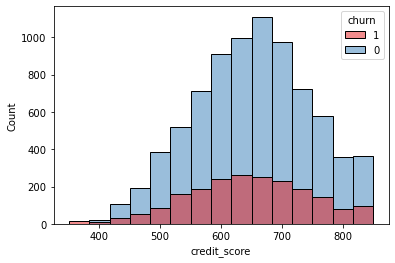

In [95]:
sns.histplot(x = "credit_score", hue = "churn", data = df,bins = 15, palette = "Set1", hue_order = [1,0]);

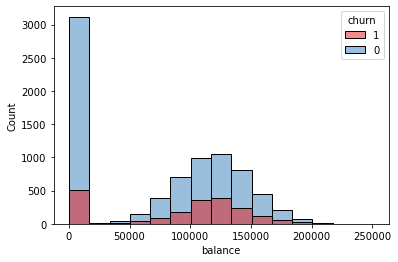

In [94]:
#With values with balance of zero included
sns.histplot(x = "balance", hue = "churn", data = df,bins = 15, palette = "Set1", hue_order = [1,0]);

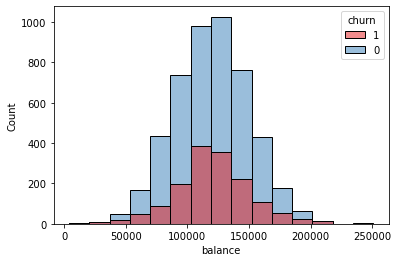

In [93]:
#Excluded datapoints with balance of zero
sns.histplot(x = "balance", hue = "churn", data = df2,bins = 15, palette = "Set1", hue_order = [1,0]);

### Modelling + Accuracy Scoring

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Encoding categorical labels for modelling

from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [102]:
#Model Training for Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

#Creating a dictionary of models with their names
models = {'Logistic Regression':LR(), 
          'Decision Tree':DT(),
          'Random Forest': RF()}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy : {accuracy_score(y_test,y_pred)} ")

Logistic Regression Accuracy : 0.8155 
Decision Tree Accuracy : 0.781 
Random Forest Accuracy : 0.866 


- According to what we found, amongst the three models Random Forest Classifier has the highest accuracy. While it isn't as close to 1 it is a reasonable value of at least 85% accuracy for our model

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = model.predict_proba(X_test)


def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sc.fit_transform(features)
    prediction = rf.predict(features).reshape(1,-1)
    return prediction[0]

In [104]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [105]:
credit_score = 699
country = 0
gender = 0
age= 39
tenure= 1
balance = 0.00
products_number= 2
credit_card = 0
active_member = 0
estimated_salary = 93826.63

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

if pred == 1:
    print("No longer a bank customer")
else:
    print("Still a bank customer")

Still a bank customer


### Abby's Code

In [50]:
lrmodel = LR().fit(X_train,y_train)
predicted_probabilities = lrmodel.predict_proba(X_test)
print(predicted_probabilities[:,1])
#append predicted probabilities in new df and sort by highest probability in descending order, gives us customer most likely to churn

[0.1595531  0.07745355 0.34810118 ... 0.32774991 0.07662728 0.11226013]


In [53]:
print("Predicted Probabilities:")
for probs in predicted_probabilities:
    formatted_probs = [f"{prob:.2f}" for prob in probs]
    print(formatted_probs)

Predicted Probabilities:
['0.84', '0.16']
['0.92', '0.08']
['0.65', '0.35']
['0.65', '0.35']
['0.91', '0.09']
['0.95', '0.05']
['0.66', '0.34']
['0.86', '0.14']
['0.60', '0.40']
['0.79', '0.21']
['0.72', '0.28']
['0.49', '0.51']
['0.78', '0.22']
['0.54', '0.46']
['0.98', '0.02']
['0.65', '0.35']
['0.68', '0.32']
['0.85', '0.15']
['0.91', '0.09']
['0.80', '0.20']
['0.85', '0.15']
['0.96', '0.04']
['0.72', '0.28']
['0.80', '0.20']
['0.67', '0.33']
['0.64', '0.36']
['0.79', '0.21']
['0.95', '0.05']
['0.94', '0.06']
['0.73', '0.27']
['0.91', '0.09']
['0.82', '0.18']
['0.79', '0.21']
['0.87', '0.13']
['0.76', '0.24']
['0.44', '0.56']
['0.69', '0.31']
['0.91', '0.09']
['0.72', '0.28']
['0.93', '0.07']
['0.75', '0.25']
['0.48', '0.52']
['0.96', '0.04']
['0.80', '0.20']
['0.74', '0.26']
['0.90', '0.10']
['0.96', '0.04']
['0.61', '0.39']
['0.90', '0.10']
['0.85', '0.15']
['0.89', '0.11']
['0.62', '0.38']
['0.58', '0.42']
['0.80', '0.20']
['0.51', '0.49']
['0.85', '0.15']
['0.94', '0.06']
['0.70

<AxesSubplot:ylabel='Feature'>

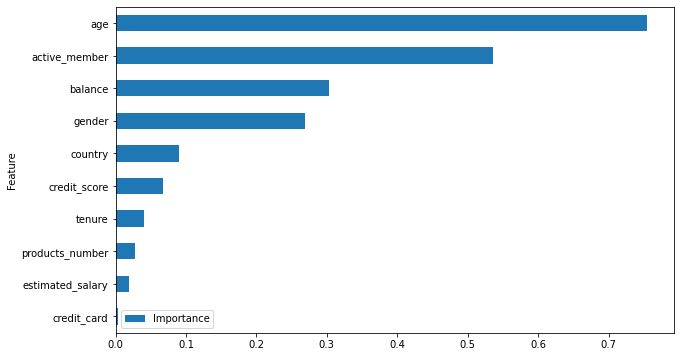

In [47]:
coefficients = lrmodel.coef_
 
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))